## Application of the Deep Learning for Pneumonia Detection Using Chest X-Ray Images

In [1]:
# import essential dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from keras import models, layers

In [30]:
# specified the directory of train, test and validation dataset
train_directory = 'C:\\Users\\65814\\OneDrive\\Projects\\keras_learning\\dataset\\chest_xray_dataset\\train'
test_directory = 'C:\\Users\\65814\\OneDrive\\Projects\\keras_learning\\dataset\\chest_xray_dataset\\test'
val_directory = 'C:\\Users\\65814\\OneDrive\\Projects\\keras_learning\\dataset\\chest_xray_dataset\\val'

In [99]:
# import the training, test and validation datasets
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale = 1./255,           # normalize pixel value to [0,1]
    rotation_range=30,          # randomly rotate images in the specified range (degree)
    width_shift_range=0.2,      # randomly shift the images horizontally
    height_shift_range=0.2,     # randomly shift the images vertically
    shear_range=0.1,            # randomly shear intensity
    zoom_range=0.2,             # randomly zoom int images
    horizontal_flip=True,       # randomly flip images
    vertical_flip=False,
    fill_mode='nearest'         # fill pixels that are newly created
)

# use the ImageDataGenerator to  apply normalization when import the validation and test datasets
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [100]:
# load the training dataset and apply the data augmentation
train_generator = datagen.flow_from_directory(
    directory = train_directory,
    target_size = (128,128),
    batch_size = 32,
    class_mode = 'binary',
    shuffle = True
)

val_generator = val_datagen.flow_from_directory(
    directory = val_directory,
    target_size = (128,128),
    batch_size = 32,
    class_mode = 'binary',
    shuffle = False
)

test_generator = test_datagen.flow_from_directory(
    directory = test_directory,
    target_size = (128,128),
    batch_size = 32,
    class_mode = 'binary',
    shuffle = False
)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [101]:
# check the class names
class_names = train_generator.class_indices
print(class_names)

{'NORMAL': 0, 'PNEUMONIA': 1}


#### Deep Neural Network

In [102]:
# define a CNN network
cnn = models.Sequential()

cnn.add(layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', input_shape=(128, 128, 3)))
cnn.add(layers.BatchNormalization())  # Add Batch Normalization here
cnn.add(layers.Activation('relu'))    # Activation after normalization
cnn.add(layers.MaxPooling2D(pool_size=(2, 2)))

cnn.add(layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
cnn.add(layers.BatchNormalization())
cnn.add(layers.Activation('relu'))
cnn.add(layers.MaxPooling2D(pool_size=(2, 2)))

cnn.add(layers.Flatten())
cnn.add(layers.Dense(units=256, activation='relu'))
cnn.add(layers.BatchNormalization())
cnn.add(layers.Dense(units=64, activation='relu'))
cnn.add(layers.Dense(units=1, activation='sigmoid'))

In [103]:
# compile the model [aka: tailor model training process]
cnn.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [104]:
# summary of the deep neural network
cnn.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_484 (Conv2D)             │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_489         │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_484 (Activation)     │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_485 (Conv2D)             │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_490         │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_485 (Activation)     │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 256)            │    16,777,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_491         │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,814,785 (64.14 MB)

 Trainable params: 16,814,081 (64.14 MB)

 Non-trainable params: 704 (2.75 KB)

In [105]:
history_cnn = cnn.fit(train_generator, epochs=10, validation_data=val_generator)

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 155s 939ms/step - accuracy: 0.8022 - loss: 0.4506 - val_accuracy: 0.5000 - val_loss: 5.6011
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 102s 627ms/step - accuracy: 0.9017 - loss: 0.2437 - val_accuracy: 0.5000 - val_loss: 6.9644
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 122s 746ms/step - accuracy: 0.9166 - loss: 0.2133 - val_accuracy: 0.5000 - val_loss: 6.1725
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 115s 704ms/step - accuracy: 0.9141 - loss: 0.2185 - val_accuracy: 0.5000 - val_loss: 3.9490
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 114s 698ms/step - accuracy: 0.9275 - loss: 0.1881 - val_accuracy: 0.6875 - val_loss: 0.4506
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 115s 704ms/step - accuracy: 0.9217 - loss: 0.1940 - val_accuracy: 0.5000 - val_loss: 3.7443
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 123s 750ms/step - accuracy: 0.9288 - loss: 0.1927 - val_accuracy: 0.5000 - val_loss: 2.7873
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 125s 766ms/step - accuracy: 0.9381 -

In [106]:
# extract the accuracy and loss of the model performance on training and validation dataset during learning process
cnn_train_acc = history_cnn.history['accuracy']
cnn_train_loss = history_cnn.history['loss']
cnn_val_acc = history_cnn.history['val_accuracy']
cnn_val_loss = history_cnn.history['val_loss']

In [107]:
# define a function to plot the accuracy and loss of the model on training and validation dataset during the learning process
def plot_result(train_acc, val_acc, train_loss, val_loss):
    
    plt.figure(figsize=(12,5))
    
    plt.subplot(1,2,1)
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.legend(loc='upper left')
    
    plt.subplot(1,2,2)
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Model Loss')
    plt.legend(loc='upper left')
    
    plt.show()

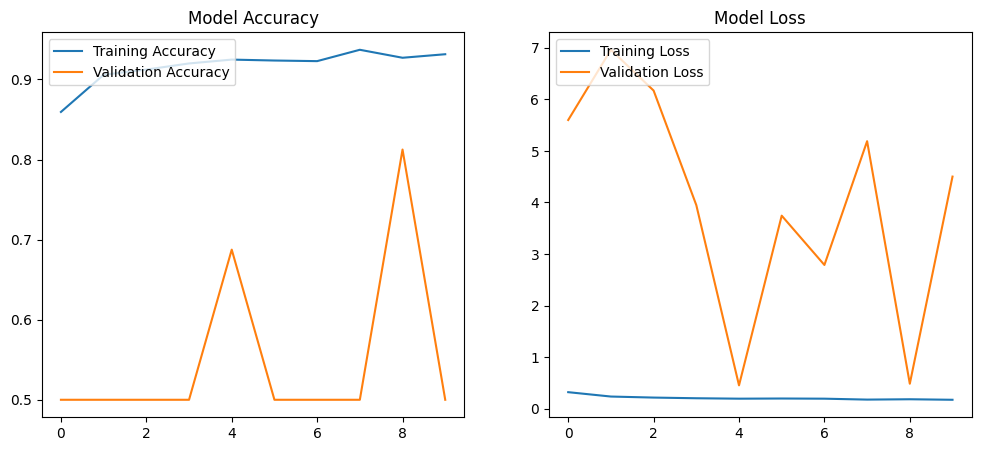

In [108]:
# visualize the model performance during the learning process
plot_result(cnn_train_acc, cnn_val_acc, cnn_train_loss, cnn_val_loss)

In [109]:
# accuracy of the neural network on test dataset
cnn_test_accuracy = round(cnn.evaluate(test_generator)[1] * 100, 2)

print('Test Accuracy:', test_accuracy,'%')

20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 524ms/step - accuracy: 0.7084 - loss: 1.9299
Test Accuracy: 80.61 %


#### Transfer Learning

In [110]:
# Load a pre-trained model (e.g., VGG16)
base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

In [111]:
# freeze the base model layers
base_model.trainable = False

In [114]:
# create a new model on top of the base model
cnn_tf = models.Sequential()
cnn_tf.add(base_model)
cnn_tf.add(layers.Flatten())
cnn_tf.add(layers.Dense(units=256, activation='relu'))
cnn_tf.add(layers.Dropout(0.5))
cnn_tf.add(layers.Dense(units=1, activation='sigmoid'))  # Sigmoid for binary classification

In [115]:
# compile the model (specified the learning process)
cnn_tf.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [116]:
history_cnn_tf = cnn_tf.fit(train_generator, epochs=10, validation_data=val_generator)

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 255s 2s/step - accuracy: 0.8080 - loss: 0.4721 - val_accuracy: 0.8750 - val_loss: 0.2456
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 270s 2s/step - accuracy: 0.9171 - loss: 0.2091 - val_accuracy: 0.8125 - val_loss: 0.2798
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 243s 1s/step - accuracy: 0.9125 - loss: 0.2030 - val_accuracy: 0.7500 - val_loss: 0.5137
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 285s 2s/step - accuracy: 0.9231 - loss: 0.1957 - val_accuracy: 0.7500 - val_loss: 0.5128
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 1957s 12s/step - accuracy: 0.9244 - loss: 0.1876 - val_accuracy: 0.7500 - val_loss: 0.4056
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 226s 1s/step - accuracy: 0.9225 - loss: 0.1852 - val_accuracy: 0.7500 - val_loss: 0.5619
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 235s 1s/step - accuracy: 0.9245 - loss: 0.1820 - val_accuracy: 0.8125 - val_loss: 0.4036
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 243s 1s/step - accuracy: 0.9244 - loss: 0.1881 - val_ac

In [117]:
# extract the accuracy and loss of the model performance on training and validation dataset during learning process
cnn_tf_train_acc = history_cnn_tf.history['accuracy']
cnn_tf_train_loss = history_cnn_tf.history['loss']
cnn_tf_val_acc = history_cnn_tf.history['val_accuracy']
cnn_tf_val_loss = history_cnn_tf.history['val_loss']

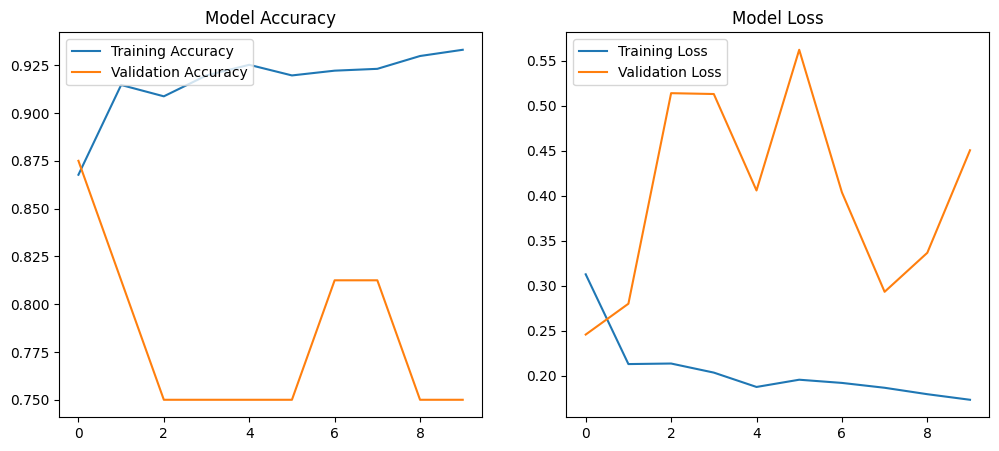

In [118]:
# visualize the model performance during the learning process
plot_result(cnn_tf_train_acc, cnn_tf_val_acc, cnn_tf_train_loss, cnn_tf_val_loss)

In [119]:
# accuracy of the neural network on test dataset
cnn_tf_est_accuracy = round(cnn_tf.evaluate(test_generator)[1] * 100, 2)

print('Test Accuracy:', cnn_tf_est_accuracy,'%')

20/20 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.8702 - loss: 0.4162
Test Accuracy: 90.38 %


In [270]:
# predicted classes 
y_pred_proba = cnn_tf.predict(test_generator)
predicted_classes = (y_pred_proba > 0.5).astype(int)

20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step


In [129]:
import os
from PIL import Image

In [303]:
# define a function to load the images and their respective lavels in numpy arrays
def load_image_from_directory(directory):
    images = []
    labels = []
    label_map = {}

    class_name = os.listdir(directory)
    
    for label in class_name:
        class_folder = os.path.join(directory, label)
        if os.path.isdir(class_folder):
            if label not in label_map:
                label_map[label] = len(label_map)

            for file_name in os.listdir(class_folder):
                img_path = os.path.join(class_folder, file_name)
                if file_name.lower().endswith(('.png','.jpeg','.jpg')):
                    img = Image.open(img_path).resize((128,128))

                    images.append(np.array(img))
                    labels.append(label_map[label])
    return np.array(images), np.array(labels), class_name

In [304]:
test_img, test_label, class_name = load_image_from_directory(test_directory)

In [314]:
import random
# define a function to random get a list with 16 numbers within a specified range
def get_numlist(max_num):
    cont = []
    while len(cont) != 16:
        j = random.randint(0, max_num)
        if j not in cont:
            cont.append(j)
    return cont

In [315]:
# define a function to inspect the prediction of the model
def display_prediction(dataset, label):
    unique_num = get_numlist(len(dataset))

    fig, axs = plt.subplots(4, 4, figsize=(12, 12))
    
    for index, axs_index in zip(unique_num, np.ndindex(axs.shape)):
        axs[axs_index].imshow(dataset[index], cmap='gray')
        axs[axs_index].set_title('True: {}, \n Prediction: {}'.format(class_name[label[index]], class_name[label[int(predicted_classes[0].item())]]))
        axs[axs_index].axis('off')

        plt.tight_layout()

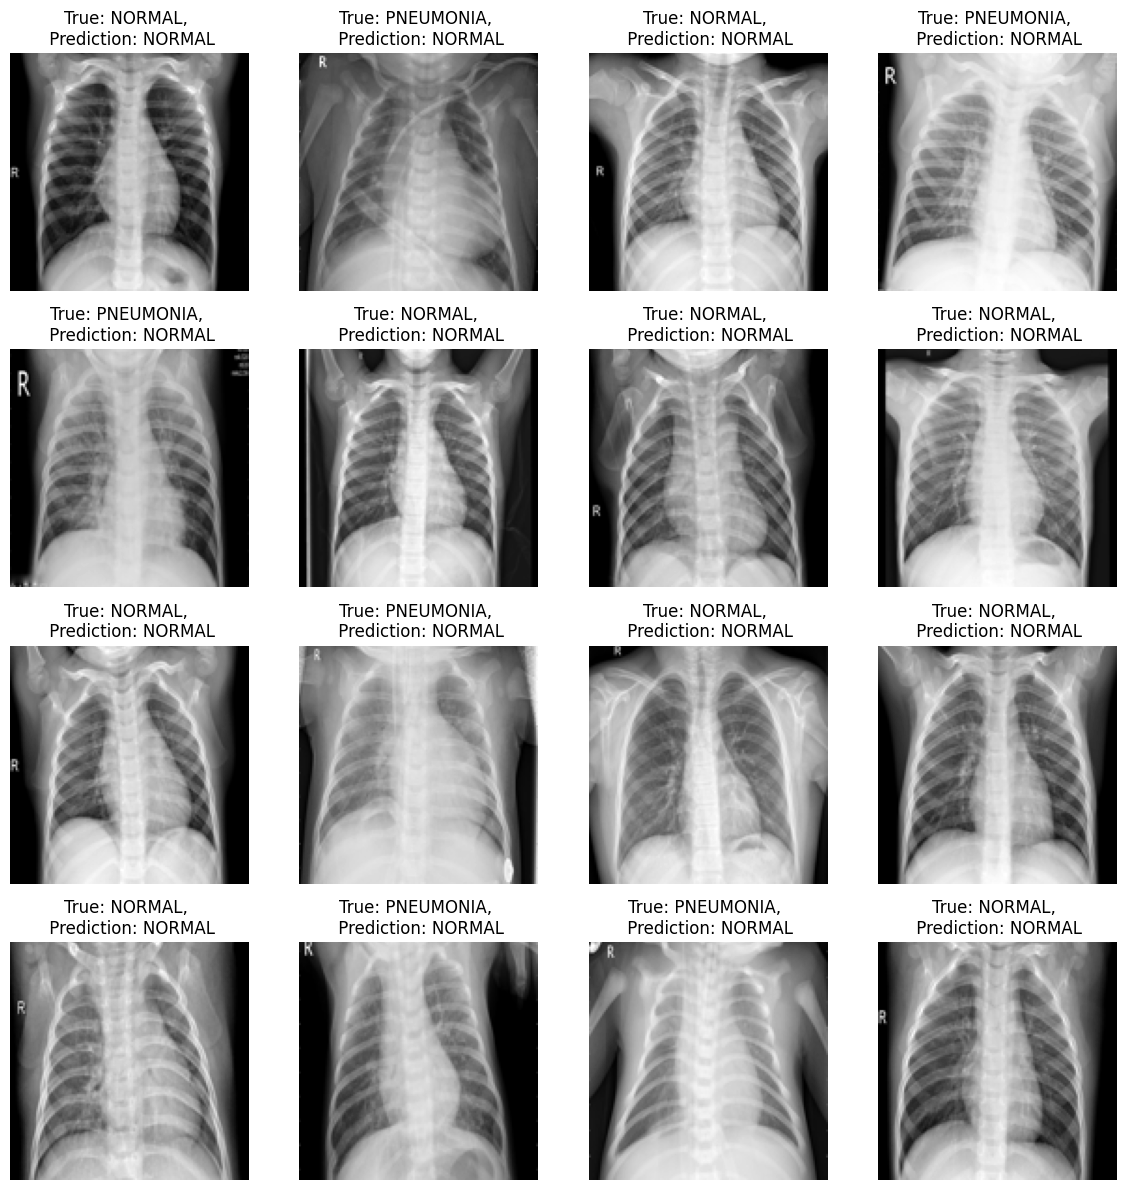

In [316]:
display_prediction(test_img, test_label)

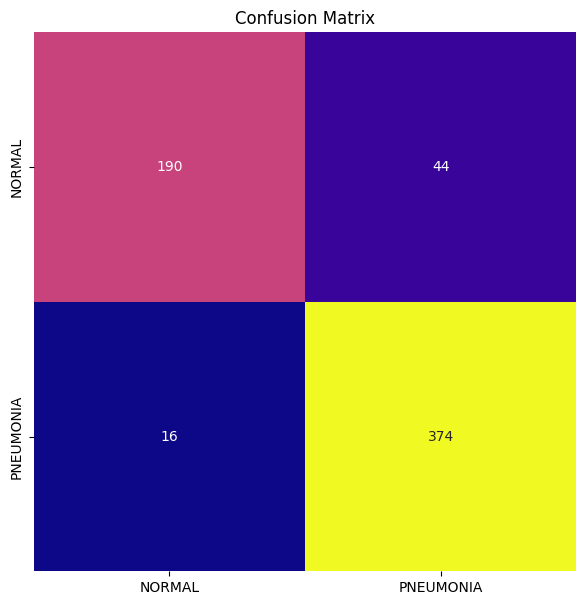

In [332]:
# confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_label, predicted_classes.reshape(-1,))
plt.figure(figsize=(7,7))
sns.heatmap(cm, cmap='plasma', annot=True, cbar=False, fmt='.5g', xticklabels=class_name, yticklabels=class_name)
plt.title('Confusion Matrix')
plt.show()

In [334]:
from sklearn.metrics import classification_report

report = classification_report(test_label, predicted_classes.reshape(-1,))
print(report)

              precision    recall  f1-score   support

           0       0.92      0.81      0.86       234
           1       0.89      0.96      0.93       390

    accuracy                           0.90       624
   macro avg       0.91      0.89      0.89       624
weighted avg       0.91      0.90      0.90       624

